<a href="https://colab.research.google.com/github/King-Bowie/TimeSeries/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capitulo 1: Introdução

## Alucar - Analisando as vendas
Neste notebook estou estudando análise de dados temporais, será utilizado a biblioteca Matplotlib e Seaborn.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

alucar = pd.read_csv("https://raw.githubusercontent.com/King-Bowie/TimeSeries/main/dados/alucar.csv")
alucar

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [2]:
print("Quantidade de linhas e colunas: ", alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [3]:
print('Quantos dados nulos:',alucar.isna().sum().sum() )

Quantos dados nulos: 0


In [4]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [5]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
sns.__version__

'0.11.2'

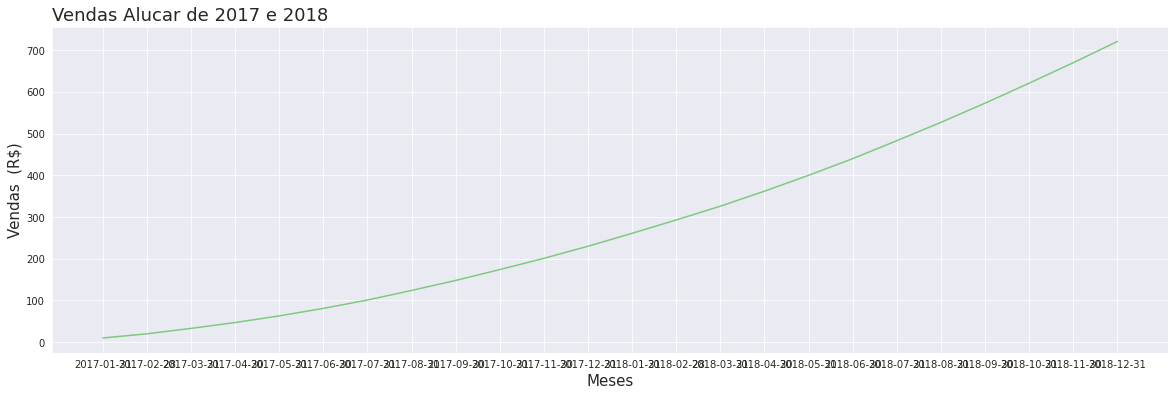

In [49]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Vendas Alucar de 2017 e 2018',loc='left', fontsize=18)
ax.figure.set_size_inches(20,6)
ax.set_xlabel('Meses', fontsize=15)
ax.set_ylabel('Vendas  (R$)', fontsize=15)
plt.show()

In [51]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


In [55]:
def plotar(titulo, labelx, labely, x, y,dataset):
  ax = sns.lineplot(x=x, y=y, data=dataset)
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax.set_title(titulo,loc='left', fontsize=18)
  ax.figure.set_size_inches(20,6)
  ax.set_xlabel(labelx, fontsize=15)
  ax.set_ylabel(labely, fontsize=15)
  plt.show()

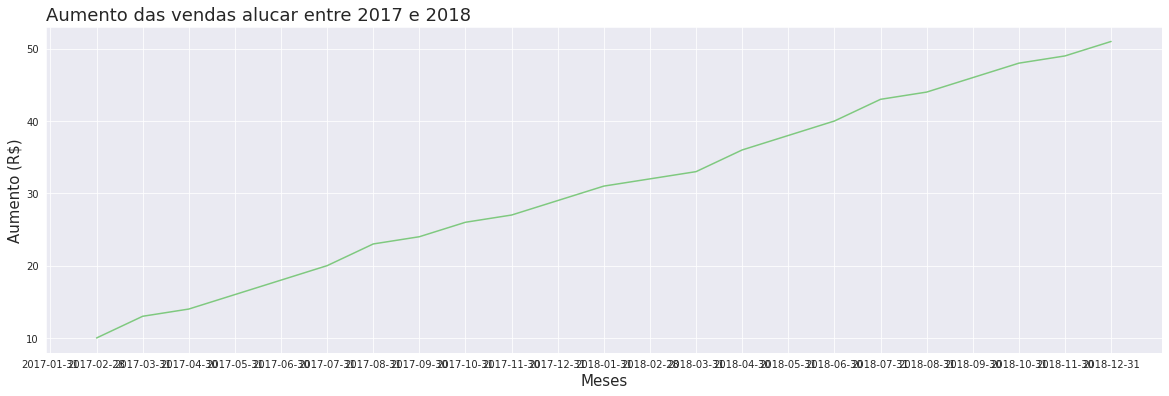

In [60]:
plotar('Aumento das vendas alucar entre 2017 e 2018','Meses','Aumento (R$)',alucar['mes'],alucar['aumento'],alucar)

In [61]:
alucar['crescimento'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,crescimento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


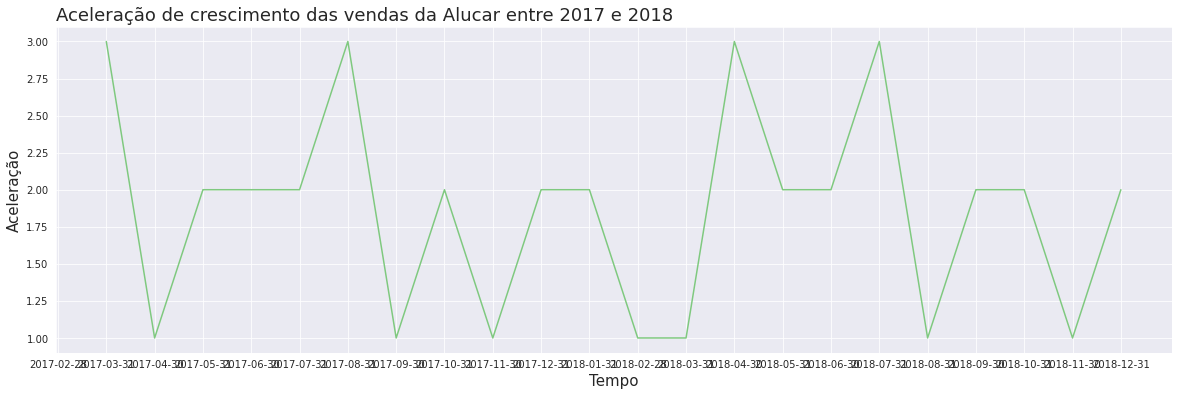

In [62]:
plotar('Aceleração de crescimento das vendas da Alucar entre 2017 e 2018','Tempo','Aceleração','mes','crescimento',alucar)

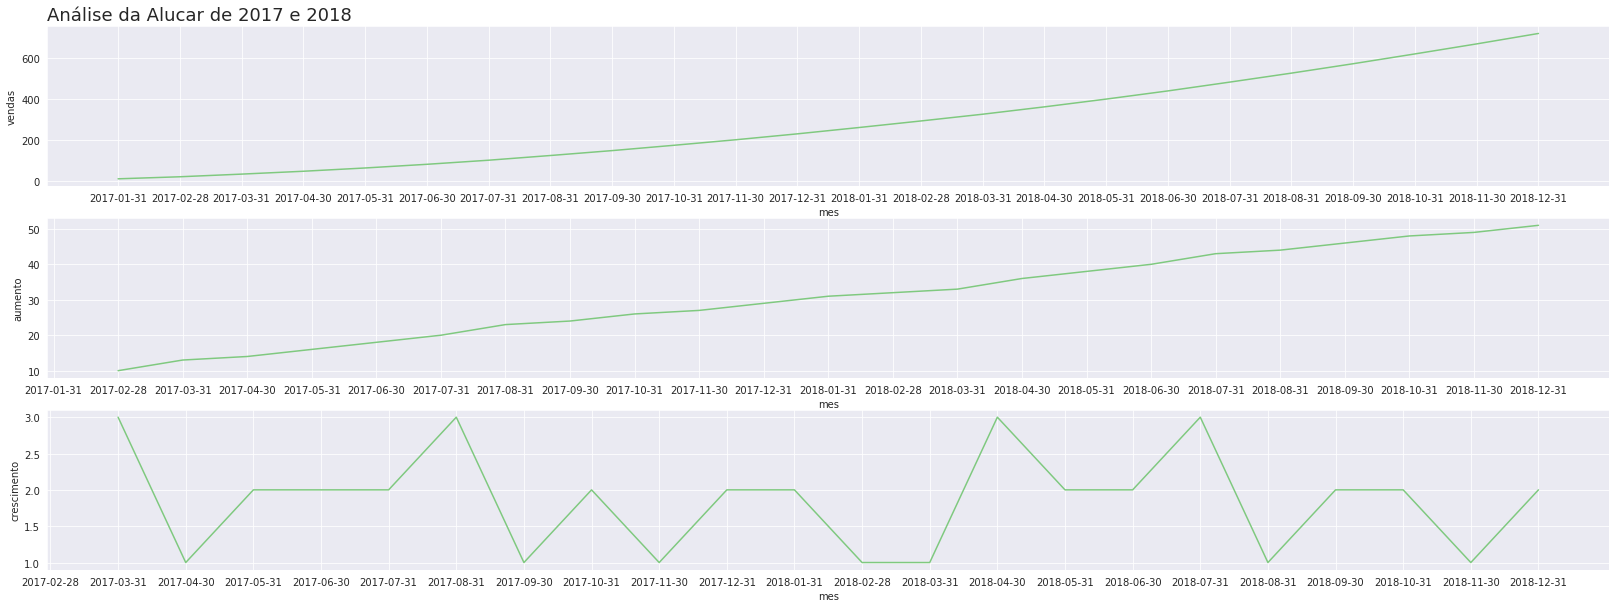

In [73]:
plt.figure(figsize=(28,10))
ax = plt.subplot(3,1,1)
ax.set_title("Análise da Alucar de 2017 e 2018", fontsize=18,loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='crescimento', data=alucar)
plt.show()

In [75]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo1,titulo2,titulo3):
  plt.figure(figsize=(28,10))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo1, fontsize=18,loc='left')
  ax = sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  ax.set_title(titulo2, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y2,data=dataset)
  plt.subplot(3,1,3)
  ax.set_title(titulo3, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y3, data=dataset)
  plt.show()

In [ ]:
plot_comparacao('mes','vendas','aumento','crescimento',alucar,'Vendas Alucar entre 2017 e 2018')